Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Read Dataset

In [4]:
df=pd.read_csv(r'medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


data explaination

In [5]:
# age | days(int)
# sex | catigorical code (1:male, 2:female)
# height | cm(int)
# weight | kg(float)
# ap_hi | Systolic blood pressure(int)
# ap_lo | diastolic blood pressure(int)
# cholesterol | catigorical code (1:normal,2: above normal,3:well above normal)
# gluc | catigorical code (1:normal,2: above normal,3:well above normal)
# smoke | binary
# alco | alcohol intake (binary)
# active | physical activite(binary)
# cardio | cardiovascular disease(binary)

In [6]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


overweight column

In [8]:
def check_bmi(h,w):
    if float(w)/((int(h)/100.0)**2)>25:
        return 1  
    else: return 0

df['overweight'] = df.apply(lambda x: check_bmi(x.height, x.weight), axis=1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalizing data

In [9]:
# any data above 1 is 1
# and 1 is 0
def norm_data(i):
    if int(i) == 1:
        return 0
    else: return 1
df['gluc']=df['gluc'].apply(norm_data)
df['cholesterol']=df['cholesterol'].apply(norm_data)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


visualization for gluc, smoke, alco, active depending on cardio

In [ ]:
# Features to compare
features = ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"]

# Split data by cardio condition
df_cardio_0 = df[df["cardio"] == 0][["active", "alco", "cholesterol", "gluc", "overweight", "smoke"]]
df_cardio_1 = df[df["cardio"] == 1][["active", "alco", "cholesterol", "gluc", "overweight", "smoke"]]

# Count occurrences of 0s and 1s in each feature
c0_counts = df_cardio_0[features].apply(pd.Series.value_counts).T
c1_counts = df_cardio_1[features].apply(pd.Series.value_counts).T
list(c1_counts.index)
c0_counts


,0,1
active,6378,28643
alco,33080,1941
cholesterol,29330,5691
gluc,30894,4127
overweight,15915,19106
smoke,31781,3240


Barplot

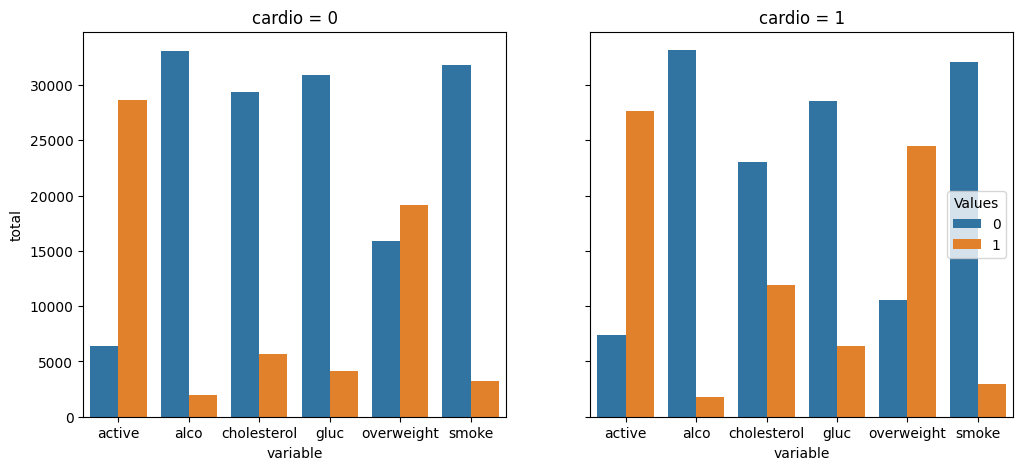

In [14]:
# Create subplots
mel_c0=c0_counts.reset_index().melt(id_vars='index',var_name='category',value_name='counts')
mel_c1=c1_counts.reset_index().melt(id_vars='index',var_name='category',value_name='counts')

fig, axes=plt.subplots(1,2,figsize=(12,5),sharey=True)

sns.barplot(data=mel_c0,ax=axes[0], x='index',y='counts',hue='category',legend=False)
axes[0].set_title("cardio = 0")
axes[0].set_xlabel("variable")
axes[0].set_ylabel("total")

sns.barplot(data=mel_c1, ax=axes[1], x='index',y='counts',hue='category')
axes[1].set_title("cardio = 1")
axes[1].set_xlabel("variable")
plt.legend(loc=5,title='Values')
sns.despine(fig=fig,ax=axes[0],top=False,right=False)
plt.show()


Another visualization

In [22]:
df_cat = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
        var_name='variable',
        value_name='value'
    )
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [23]:

    # Group and reformat data
df_group = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
df_group


,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


C:\Users\ahmed\AppData\Local\Temp\ipykernel_18704\1872881453.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_18704\1872881453.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])


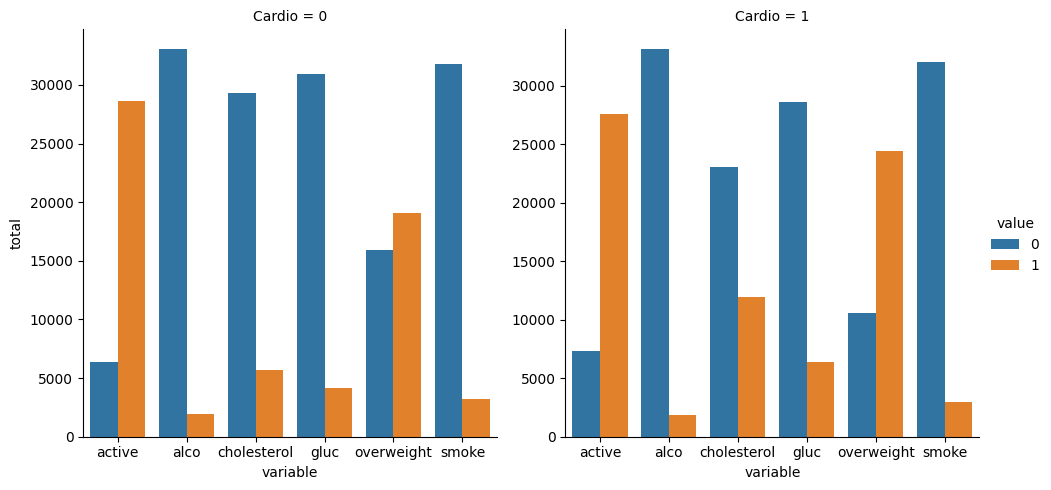

In [24]:
    # Draw the catplot
g = sns.catplot(
        data=df_group,
        x='variable',
        y='total',
        hue='value',
        col='cardio',
        kind='bar',
        sharex=False,
        sharey=False
    )
    
    # Set axis labels and titles
g.set_axis_labels("variable", "total")
g.set_titles("Cardio = {col_name}")

    # Adjust x-tick labels to match test expectations
for ax in g.axes.flat:
        ax.set_xticklabels(['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
plt.show()

Heatmap

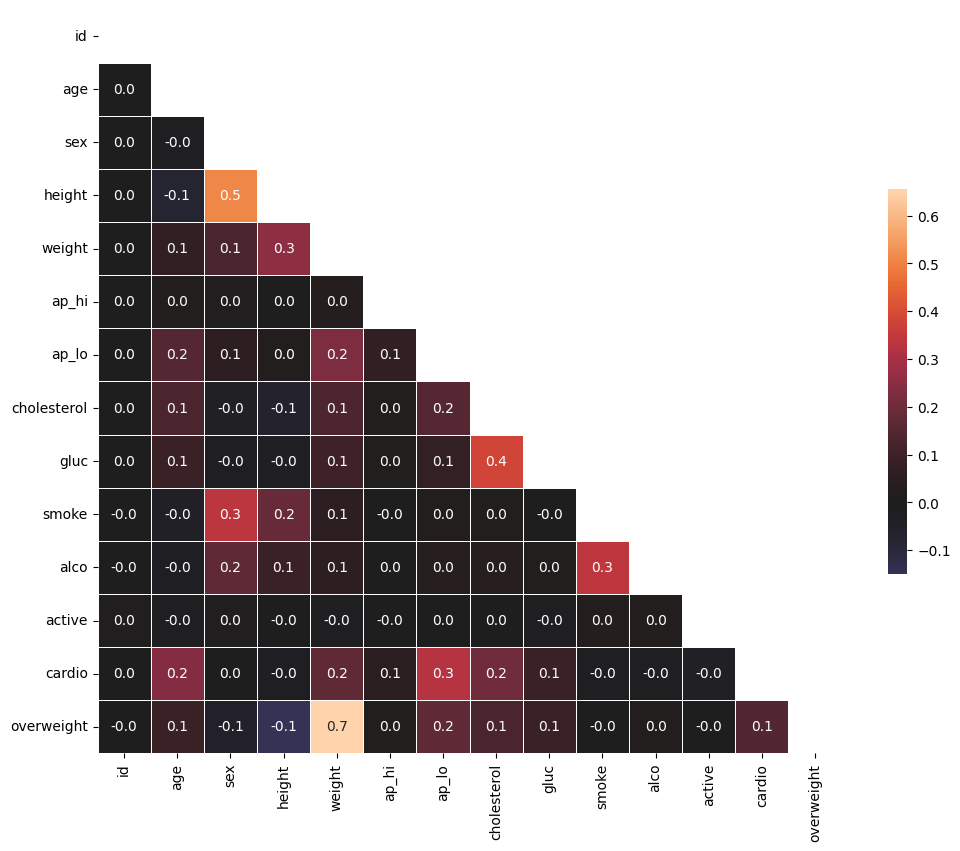

In [21]:
df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
corr = df_heat.corr()

    # Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap
sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".1f",
        linewidths=0.5,
        square=True,
        center=0,
        cbar_kws={"shrink": 0.5},
        ax=ax
    )
plt.show()